# Fourier Transforms

Probably the most important integral in science is the Fourier transform. 
The Fourier Transfrom was first developed 1822 by French mathematician [Joesph Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier), who was trying to develop an analytical theory of heat transfer. 
In the process of doing this, he claimed that any function, continuous or discontinuous and be described with an expanded series of sine waves, the process of this expansion is a **Fourier transform**. 
From this expanded series of sine waves, we can obtain information about the frequency of the function, which as we will see, is very useful in the analysis of scientific data. 

```{figure} ../images/ft-gif.gif
---
name: ft-gif
height: 215px
---
A graphical description of the decomposition of a function into a series of sine waves, that give frequency information from the original function; i.e., the Fourier transform.
```

The Fourier transform can be written as an infinite integral, 

$$
\widehat {f}(\xi )=\int _{-\infty }^{\infty }f(x)\ e^{-i2\pi \xi x}\;\text{d}x.
$$

For [some functions](https://en.wikipedia.org/wiki/Fourier_inversion_theorem#Conditions_on_the_function), it is possible to invert the Fourier transform, 

$$
f(x)=\int _{-\infty }^{\infty }{\widehat {f}}(\xi )\ e^{i2\pi \xi x}\;d\xi.
$$

```{admonition} Fourier Transforms in Diffraction
:class: tip
The Fourier transform is a valuable tool in chemistry and physics, where it can be used to estimate the structure of molecules from diffraction. 
Diffraction is the process where waves of light (X-rays), neutrons, or electrons interact with the periodic structure of a molecular system, such as a crystal lattice. 
As these waves encounter the regularly spaced atoms in a molecule or crystal, they scatter in specific directions due to constructive and destructive interference.
We can think of a diffraction pattern as the Fourier transform of the positions of the molecules in space. 
```

The relationship between the Fourier transform and its inverse is referred to as a Fourier transform pair, and typically the following notation is used, 

$$
f(x)\ {\stackrel {\mathcal {F}}{\longleftrightarrow }}\ {\widehat {f}}(\xi ),
$$

where the $\mathcal{F}$ "fancy-F" indicates a Fourier transform has been used. 
However, the above equations are rather intangible, let's look at some practical implementations. 

## Fourier Series

A specific application of the Fourier transform to periodic, i.e., repeating functions, is known as a Fourier series, in fact, this is what is shown in {numref}`ft-gif`.
The difference between the Fourier transform and the Fourier series, is that the latter produces discrete frequencies rather than a continuous spectrum.
The equation for the Fourier series is 

$$
f(x)=\sum _{n=-\infty }^{\infty }c_{n}\,e^{i2\pi {\tfrac {n}{P}}x},
$$

which can also be written as a summation of discrete sine waves, 
````{margin}
```{note}
Personally, I prefer the notation in Eqn. {eq}`sines-series` as it avoids the complex number notation.
```
````

$$
f(x) = a_0 + \sum_{n=1}^{\infty} \left[a_n \cos\left(\frac {n}{P} x\right) + b_n \sin\left(\frac {n}{P} x\right)\right],
$$ (sines-series)

where $a_n$ and $b_n$ are the Fourier coefficients. 
Let's look at using Python to decompose a given function into it Fourier coefficients. 
Consider the following function, 

$$
f(x) = \sin(2x) + 2 \cos(10x) + 0.6 \sin(20x), 
$$

which gives something that looks like the following. 

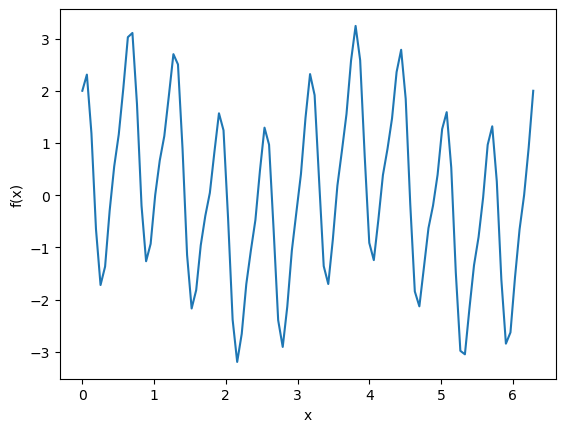

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(2 * x) + 2 * np.cos(10 * x) + 0.6 * np.sin(20 * x)

fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

If we were given this data, without information about the functional form, would it be possible to get the values for $a_n$ and $b_n$?
This is where the Fourier transform (or more strictly in this case, the discrete Fourier transform) can help. 
In `numpy`, we can access a Fourier transform with the `np.fft.fft` function. 

````{margin}
```{note}
The `np.fft.fft` function performs what is called a [fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform) (FFT). 
This is a special algorithm that is able to estimate a (discrete) Fourier transform extremely efficiency. 
The FFT was popularised by Cooley and Tukey (pioneers of data science) in the 1960s but actually originally invented by [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) in the 1800s, who used it to study the trajectories of asteroids. 
```
````

In [3]:
yf = np.fft.fft(y)

To obtain numerically meaningful results, we need to normalise `yf` by half the number of samples. 

In [4]:
yf /= y.size * 0.5

It is also necessary to obtain the frequency axis, which can be achieved with the `np.fft.fftfreq` function. 
This produces number from $\frac{-(n-1)}{2nd}$ to $\frac{(n-1)}{2nd}$, where $n$ is the number of samples and $d$ is the sample spacing. 

In [5]:
frequency = np.fft.fftfreq(y.size, d=1/x.size)

The output of the fft is an array of [complex numbers](https://en.wikipedia.org/wiki/Complex_number), having a real and imaginary components. 
Let's look at plotting each. 

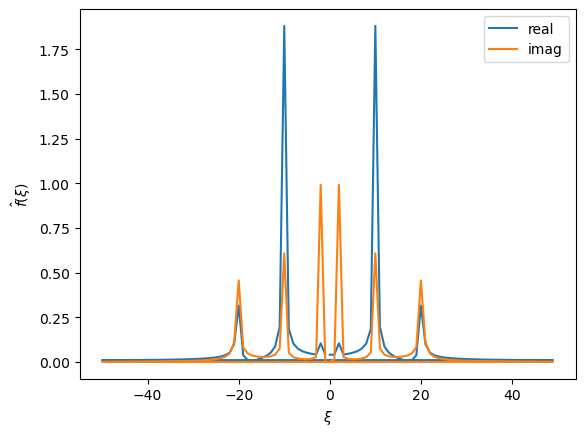

In [6]:
fig, ax = plt.subplots()

ax.plot(frequency, np.abs(yf.real), label='real')
ax.plot(frequency, np.abs(yf.imag), label='imag')
ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\hat{f}(\xi)$')
ax.legend()
plt.show()

This can be a little difficult to interpret, so lets just look at the positive values of $\xi$. 

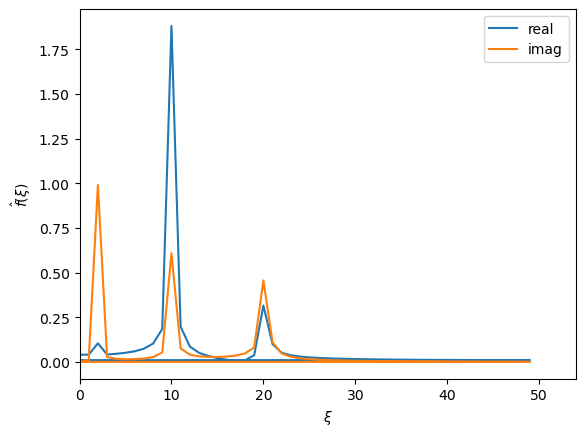

In [7]:
fig, ax = plt.subplots()

ax.plot(frequency, np.abs(yf.real), label='real')
ax.plot(frequency, np.abs(yf.imag), label='imag')
ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\hat{f}(\xi)$')
ax.set_xlim(0, None)
ax.legend()
plt.show()

It is clear that there are three peaks in each signal, the larger at each position corresponds to the sine or cosine part in Eqn. {eq}`sines-series`. 
We can see that in the real signal there is one peak that is larger than the imaginary signal. 
This is at $\xi$ of 10, corresponding to $n/P$ of 10 and this has a height of around 2, which is the Fourier coefficient $a_{10}$. 
The same is true for the real signal and the sine parts. 
However, you may notice that the signal isn't perfect, e.g., the peaks at $\xi$ of 20 are very similar in height to is may be hard to determine if this is a sine or a cosine part. 

## Discrete Fourier Transform

Computationally, working with continuous functions is challenging. 
Usually, we handle discrete values of some variable, indeed, this is the case above. 
For this, neither the Fourier transform nor the Fourier series are suitable, as they both take a continuous input. 
Hence, we use the **discrete Fourier transform**, 

$$
X_{k}=\sum _{n=0}^{N-1}x_{n}\cdot e^{-i2\pi {\tfrac {k}{N}}n}. 
$$ (dft)

Notice, there is no longer any $\infty$ symbols in this function.

The discrete Fourier transform can be thought of as directly analogus to a Fourier series, but for a discrete input. 
Hence, if your input has a high enough sampling (i.e., as the sampling frequency tends to infinity), the discrete Fourier transform tends to a Fourier series.
We can see this in action by repeating the above analysis but on a finer grid of points in $x$. 
Instead of using 100 samples, below we use 10 000.

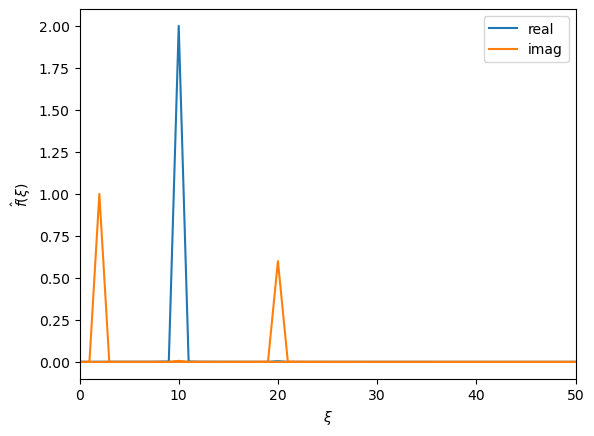

In [8]:
x = np.linspace(0, 2*np.pi, 10_000)
y = np.sin(2 * x) + 2 * np.cos(10 * x) + 0.6 * np.sin(20 * x)

yf = np.fft.fft(y) / (y.size * 0.5)
frequency = np.fft.fftfreq(y.size, d=1/x.size)

fig, ax = plt.subplots()

ax.plot(frequency, np.abs(yf.real), label='real')
ax.plot(frequency, np.abs(yf.imag), label='imag')
ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\hat{f}(\xi)$')
ax.set_xlim(0, 50)
ax.legend()
plt.show()

You will notice that, the higher sampling frequency significantly improves the accuracy of the Fourier coefficient estimation. 
This is a common problem in the scientific applications of Fourier analysis. 
The resolution of our measurements may not be sufficiently high to provide high accuracy estimates of the Fourier coefficients. 

```{admonition} Fourier Transforms for Periodicity
:class: tip
One of the most common applications of Fourier transforms is to investigate the periodicity of some function. 
For example, consider a single periodic sine wave, the Fourier transform of this would be a single delta function at the periodic frequency of the wave. 
This makes Fourier transforms extremely powerful in the measurement of repeating trends in measured data. 
```